<a href="https://colab.research.google.com/github/jeanine5/ML_Classification/blob/main/CapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom Customer Churn

Customer churn, also called customer attrition, is the number of paying customers who fail to become repeat customers. One of the most common reasons customers churn is pricing. In this project, I will use machine learning algortihms, packages, and libraries to predict whether a customer churns in a given dataset.

This data set consists of 100 variables and approx 100 thousand records. This data set contains different variables explaining the attributes of telecom industry and various factors considered important while dealing with customers of telecom industry. The target variable here is churn which explains whether the customer will churn or not. We can use this data set to predict the customers who would churn or who wouldn't churn depending on various variables available.

In [ ]:
# Import relevant Python packages
import matplotlib.pyplot as plt        # visualization
import numpy as np                     # matrices and high-level math functions
import pandas as pd                    # data manipulation
import seaborn as sns                  # visualization (based on matplotlib)

# import modeling methods from sklearn package 
from sklearn.preprocessing import StandardScaler    
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Loading the data

Here, we will read from the comma-separated datset and load it in a way in which we can program from it.

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
df = pd.read_csv('/drive/MyDrive/ML/Telecom_customer.csv')

In [ ]:
# shows the first five rows of the dataset
df.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


This data set consists of 100 variables and approx 100 thousand records. Now that we have read from the csv, we can use this information to make a  prediction.

# Exploratory Data Analysis

In this section, we will break down the dataset to get an initial understanding of what the dataset is providing us. We will see the telecom datatset dimensions, data types of each feature, and more!

In [ ]:
# displays the number of rows and columns in the dataset
print("Dimension of the Telecom dataset:", df.shape)

Dimension of the Telecom dataset: (100000, 100)


In [ ]:
# prints statistical rundown of each variable in the dataset
df.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99109.000000,...,99999.000000,98268.000000,98268.000000,69810.000000,76981.000000,74564.000000,50634.000000,98268.000000,99999.000000,1.000000e+05
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.261318,1.286405,-13.933818,...,1.545825,0.188820,0.082580,6.177238,2.530326,5.783112,1.567563,0.057974,391.932309,1.050000e+06
std,46.291677,525.168140,23.623489,2.177619,97.296150,30.500885,30.056089,3.126531,14.711374,276.087509,...,0.898395,0.391368,0.275248,4.735267,1.452819,2.182132,0.625456,0.233696,256.482193,2.886766e+04
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.000000,1.000001e+06
25%,33.260000,150.750000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-87.000000,...,1.000000,0.000000,0.000000,2.000000,1.000000,4.000000,1.000000,0.000000,212.000000,1.025001e+06
50%,48.195000,355.500000,44.990000,0.247500,2.750000,1.000000,0.682500,0.000000,0.000000,-6.250000,...,1.000000,0.000000,0.000000,5.000000,2.000000,6.000000,1.000000,0.000000,342.000000,1.050000e+06
75%,70.750000,703.000000,59.990000,0.990000,42.000000,14.437500,14.025000,0.000000,0.235000,63.000000,...,2.000000,0.000000,0.000000,9.000000,3.000000,7.000000,2.000000,0.000000,530.000000,1.075000e+06
max,3843.262500,12206.750000,409.990000,159.390000,4320.750000,1102.400000,896.087500,423.540000,3685.200000,31219.250000,...,16.000000,1.000000,1.000000,15.000000,6.000000,9.000000,3.000000,1.000000,1823.000000,1.100000e+06


Note that the statistical rundown using .describe() is only on the numerical features, hence why there are only 79 columns and not 100 columns.

In [ ]:
# gives the data type of each feature in the dataset
print("Data type of each feature:")
df.dtypes

Data type of each feature:


rev_Mean       float64
mou_Mean       float64
totmrc_Mean    float64
da_Mean        float64
ovrmou_Mean    float64
                ...   
kid11_15        object
kid16_17        object
creditcd        object
eqpdays        float64
Customer_ID      int64
Length: 100, dtype: object

Notice from above, there are 100 features in the dataset, so df.dtypes does not display all 100 feature types but only the first and last 5 feature types. Rather than make assumptions about what the other feature data types may be, we will use .info() to fill in the gaps. This will also tell us if any of the variables contain null values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

It is also important to check the dataset for missing data or duplicate data. Missing or duplicate data can bias the results of the machine learning models and reduce the accuracy of the model. We will use .isnull() and .duplicates to determine this information. We can also see that in the non-null column from above, several features have less than 100,000 non-null data points alerting us that there are missing values.

In [ ]:
# determine if there are any missing datapoints or duplicate rows in the dataset
print("\nMissing datapoints?", df.isnull().values.any())
print("Number of duplicated rows:", df.duplicated().sum())


Missing datapoints? True
Number of duplicated rows: 0


From the analysis so far, we have concluded that there are 100,000 datapoints with 100 columns/features in the dataset:


1. rev_Mean: Mean monthly revenue (charge amount)
2. mou_Mean: Mean number of monthly minutes of use
3. totmrc_Mean: Mean total monthly recurring charge
4. da_Mean: Mean number of directory assisted calls
5. ovrmou_Mean: Mean overage minutes of use
6. ovrrev_Mean: Mean overage revenue
7. vceovr_Mean: Mean revenue of voice overage
8. datovr_Mean: Mean revenue of data overage
9. roam_Mean: Mean number of roaming calls
10. change_mou: Percentage change in monthly minutes of use vs previous three month average
11. change_rev: Percentage change in monthly revenue vs previous three month average
12. drop_vce_Mean: Mean number of dropped (failed) voice calls
13. drop_dat_Mean: Mean number of dropped (failed) data calls
14. blck_vce_Mean: Mean number of blocked (failed) voice calls
15. blck_dat_Mean: Mean number of blocked (failed) data calls
16. unan_vce_Mean: Mean number of unanswered voice calls
17. unan_dat_Mean: Mean number of unanswered data calls
18. plcd_vce_Mean: Mean number of attempted voice calls placed
19. plcd_dat_Mean: Mean number of attempted data calls placed
20. recv_vce_Mean: Mean number of received voice calls
21. recv_sms_Mean: N
22. comp_vce_Mean: Mean number of completed voice calls
23. comp_dat_Mean: Mean number of completed data calls
24. custcare_Mean: Mean number of customer care calls
25. ccrndmou_Mean: Mean rounded minutes of use of customer care calls
26. cc_mou_Mean: Mean unrounded minutes of use of customer care (see CUSTCARE_MEAN) calls
27. inonemin_Mean: Mean number of inbound calls less than one minute
28. threeway_Mean: Mean number of three way calls
29. mou_cvce_Mean: Mean unrounded minutes of use of completed voice calls
30. mou_cdat_Mean: Mean unrounded minutes of use of completed data calls
31. mou_rvce_Mean: Mean unrounded minutes of use of received voice calls
32. owylis_vce_Mean: Mean number of outbound wireless to wireless voice calls
33. mouowylisv_Mean: Mean unrounded minutes of use of outbound wireless to wireless voice calls
34. iwylis_vce_Mean: N
35. mouiwylisv_Mean: Mean unrounded minutes of use of inbound wireless to wireless voice calls
36. peak_vce_Mean: Mean number of inbound and outbound peak voice calls
37. peak_dat_Mean: Mean number of peak data calls
38. mou_peav_Mean: Mean unrounded minutes of use of peak voice calls
39. mou_pead_Mean: Mean unrounded minutes of use of peak data calls
40. opk_vce_Mean: Mean number of off-peak voice calls
41. opk_dat_Mean: Mean number of off-peak data calls
42. mou_opkv_Mean: Mean unrounded minutes of use of off-peak voice calls
43. mou_opkd_Mean: Mean unrounded minutes of use of off-peak data calls
44. drop_blk_Mean: Mean number of dropped or blocked calls
45. attempt_Mean: Mean number of attempted calls
46. complete_Mean: Mean number of completed calls
47. callfwdv_Mean: Mean number of call forwarding calls
48. callwait_Mean: Mean number of call waiting calls
49. churn: Instance of churn between 31-60 days after observation date
50. months: Total number of months in service
51. uniqsubs: Number of unique subscribers in the household
52. actvsubs: Number of active subscribers in household
53. new_cell: New cell phone user
54. crclscod: Credit class code
55. asl_flag: Account spending limit
56. totcalls: Total number of calls over the life of the customer
57. totmou: Total minutes of use over the life of the cus
58. totrev: Total revenue
59. adjrev: Billing adjusted total revenue over the life of the customer
60. adjmou: Billing adjusted total minutes of use over the life of the customer
61. adjqty: Billing adjusted total number of calls over the life of the customer
62. avgrev: Average monthly revenue over the life of the customer
63. avgmou: Average monthly minutes of use over the life of the customer
64. avgqty: Average monthly number of calls over the life of the customer
65. avg3mou: Average monthly minutes of use over the previous three months
66. avg3qty: Average monthly number of calls over the previous three months
67. avg3rev: Average monthly revenue over the previous three months
68. avg6mou: Average monthly minutes of use over the previous six months
69. avg6qty: Average monthly number of calls over the previous six months
70. avg6rev: Average monthly revenue over the previous six months
71. prizm_social_one: Social group letter only
72. area: Geogrpahic area
73. dualband: Dualband
74. refurb_new: Handset: refurbished or new
75. hnd_price: Current handset price
76. phones: Number of handsets issued
77. models: Number of models issued
78. hnd_webcap: Handset web capability
79. truck: Truck indicator
80. rv: RV indicator
81. ownrent: Home owner/renter status
82. lor: Length of residence
83. dwlltype: Dwelling Unit type
84. marital: Marital Status
85. adults: Number of adults in household
86. infobase: InfoBase match
87. income: Estimated income
88. numbcars: Known number of vehicles
89. HHstatin: Premier household status indicator
90. dwllsize: Dwelling size
91. forgntvl: Foreign travel dummy variable
92. ethnic: Ethnicity roll-up code
93. kid0_2: Child 0 - 2 years of age in household
94. kid3_5: Child 3 - 5 years of age in household
95. kid6_10: Child 6 - 10 years of age in household
96. kid11_15: Child 11 - 15 years of age in household
97. kid16_17: Child 16 - 17 years of age in household
98. creditcd: Credit card indicator
99. eqpdays: Number of days (age) of current equipment
100. Customer_ID: N


Since we have at several missing values in our dataset, we must take care of the values before we start our manipultaion of the data. But first, let's visualize the raw data.

# Data Visualization

Now that we have laid out and analyzed our data, we can see what we have so far visually. We can visulaize each feature by using a hisyogram or bargraph. The numerical features will use histograms and the non-numerical features use a bargraph. Below, df.iloc works based on integer positioning and df.iloc[:,:] means the intersection of all rows and columns in the dataset. So what is created below are histograms of each column (feature) by each row.

source:https://stackoverflow.com/questions/31593201/how-are-iloc-and-loc-different

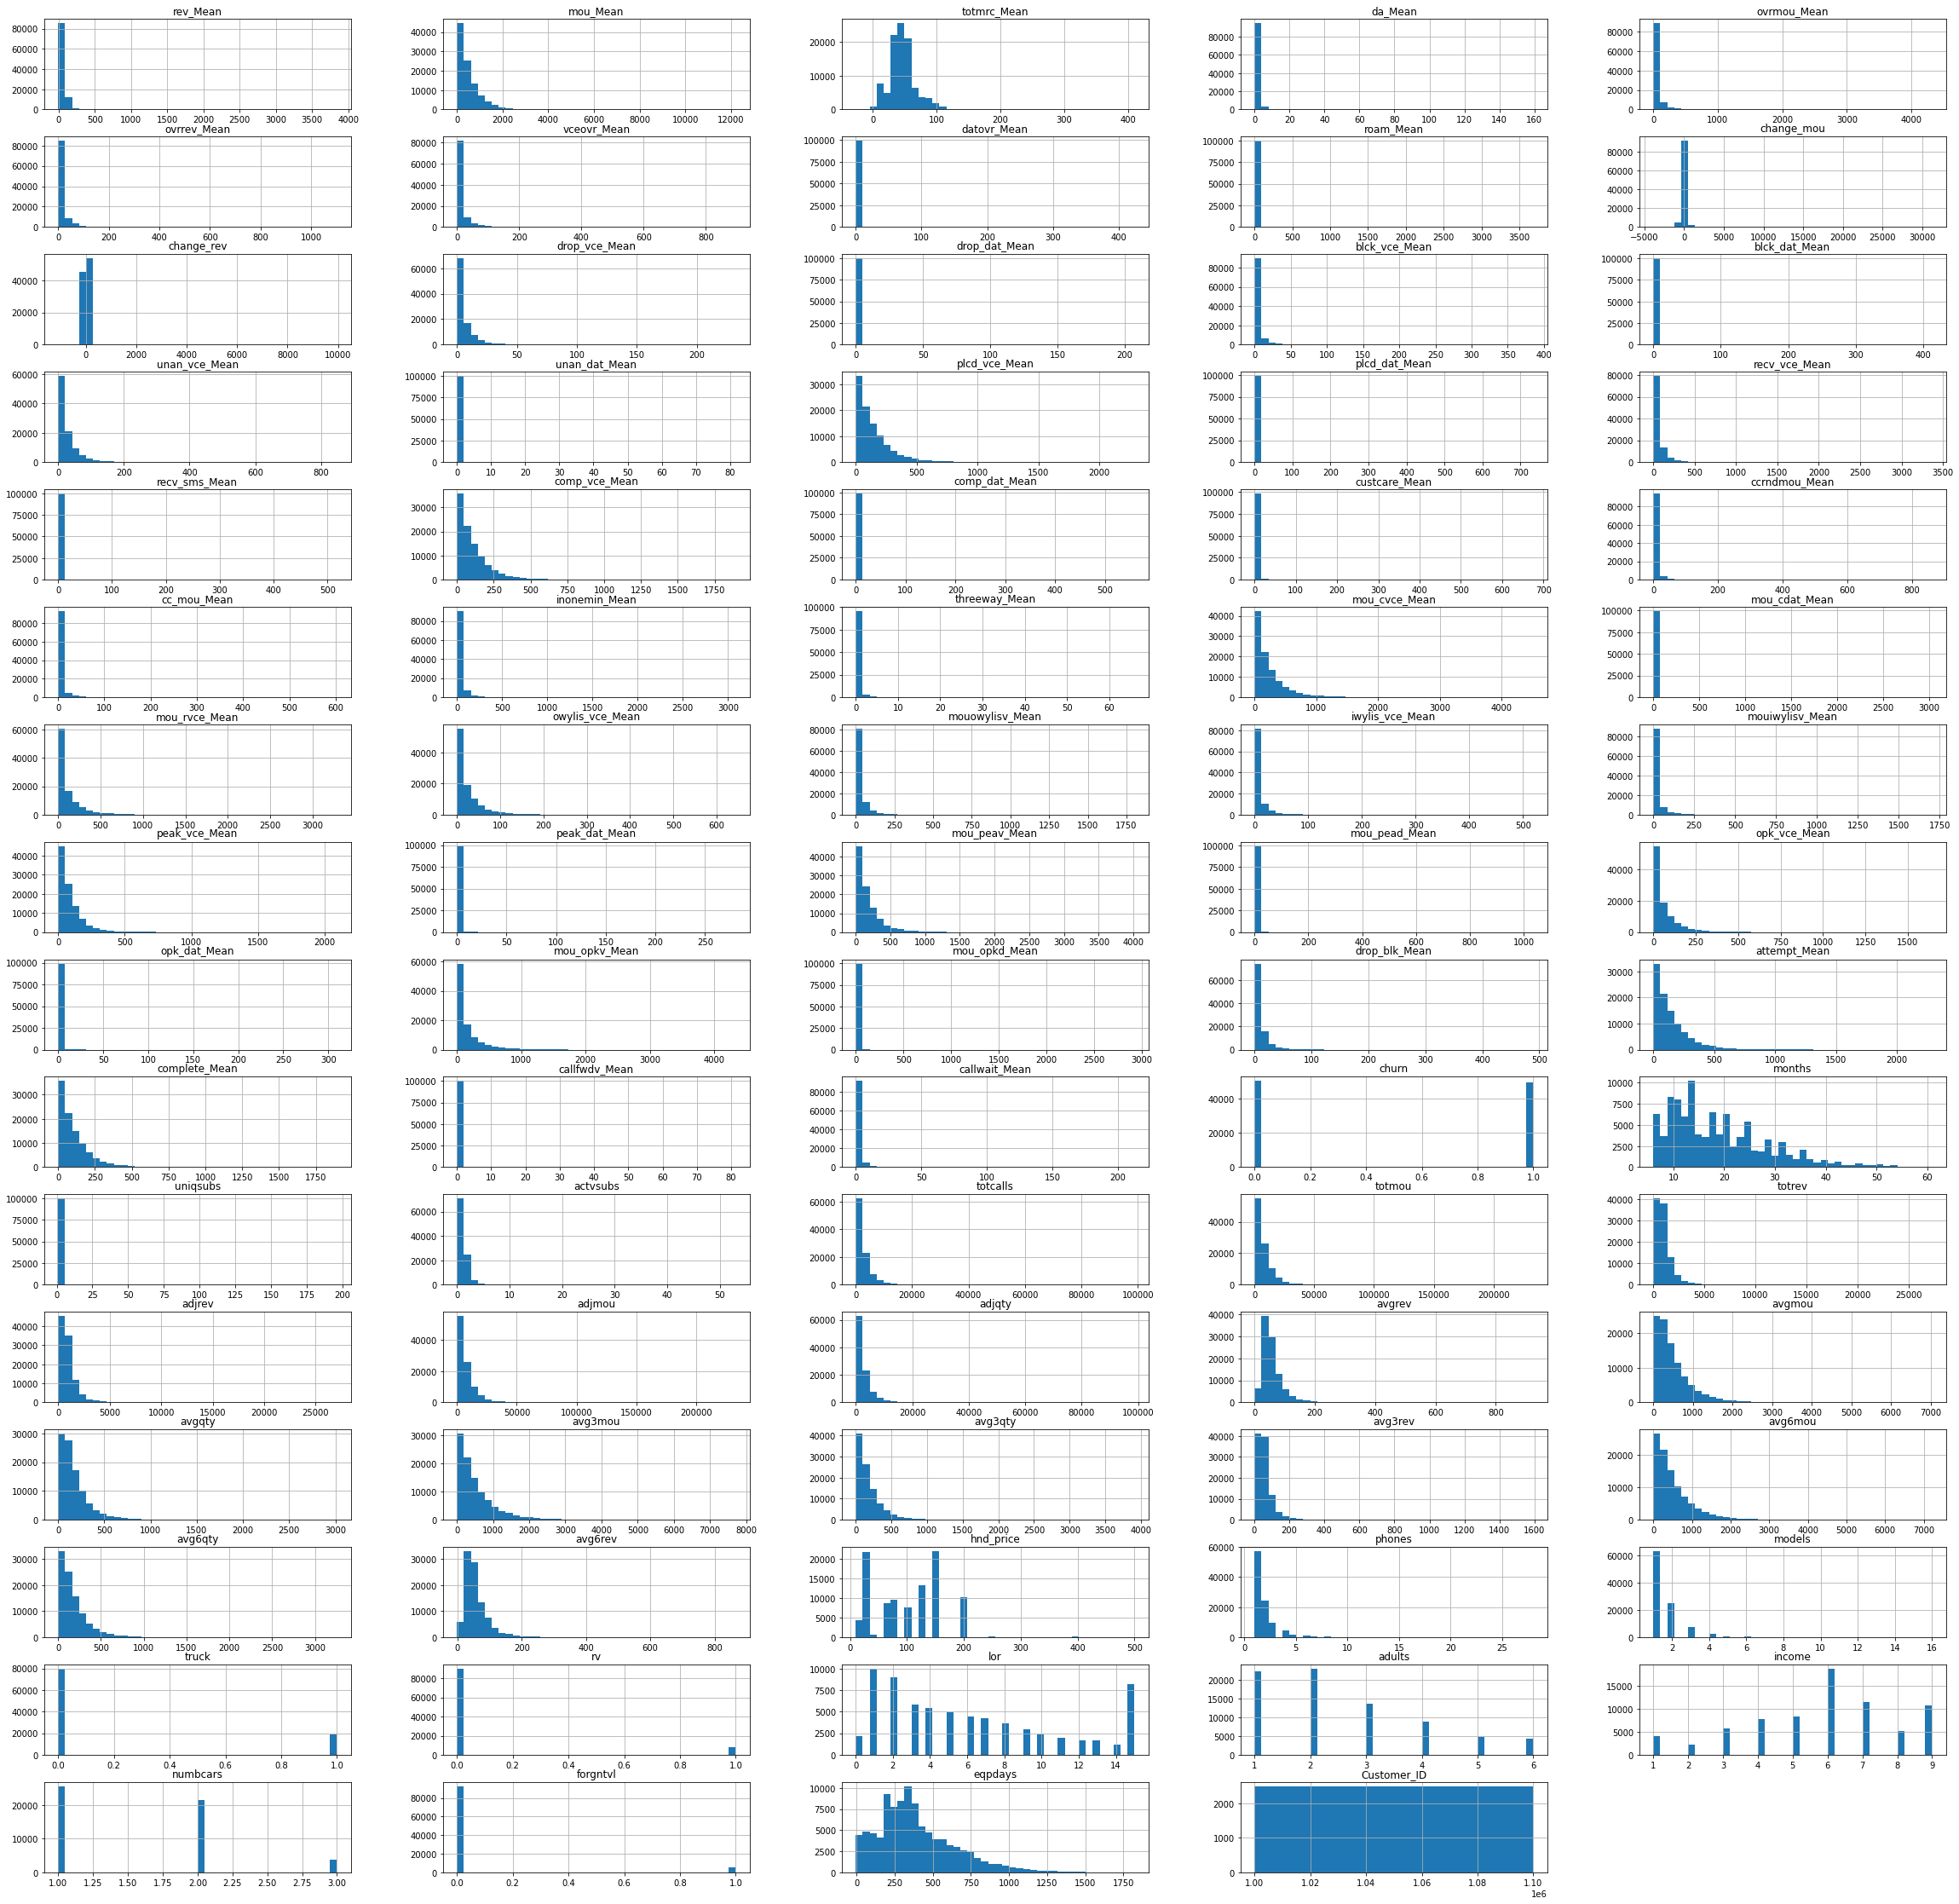

In [ ]:
# df.iloc works based on integer positioning
# df.iloc[:,:] means the inters 
df.iloc[:,:].hist(bins=40,figsize=(40,40),layout=(16,5));

Next, we visulaize the non-numerical features. We compare these features against the churn feature since they carry no numerical weight. Here, the blue (0) means the number of customers that did not churn and the orange (1) is the number of customers that did churn.

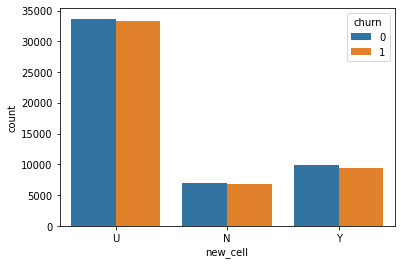

In [ ]:
# new_cell vs churn
sns.countplot(x= "new_cell", hue="churn", data=df);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

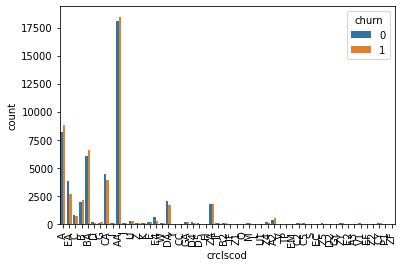

In [ ]:
# crclscod feature
sns.countplot(x= "crclscod", hue="churn", data=df, );
plt.xticks(rotation =90)

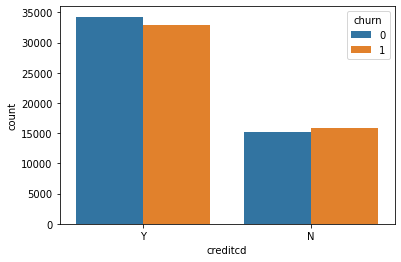

In [ ]:
# creditcd feature
sns.countplot(x= "creditcd", hue="churn", data=df);

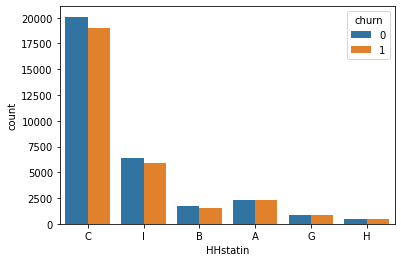

In [ ]:
# HHstatin feature
sns.countplot(x= "HHstatin", hue="churn", data=df);

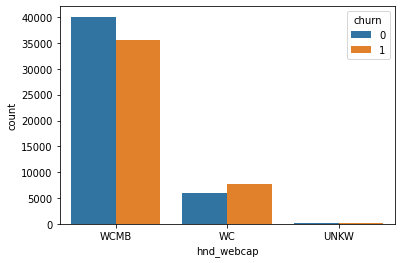

In [ ]:
# hnd_webcap feature
sns.countplot(x= "hnd_webcap", hue="churn", data=df);

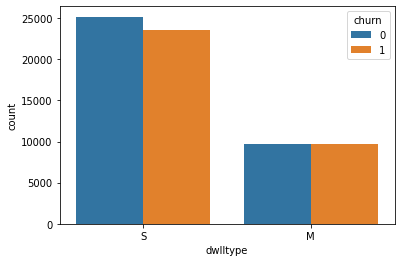

In [ ]:
# dwlltype feature
sns.countplot(x= "dwlltype", hue="churn", data=df);

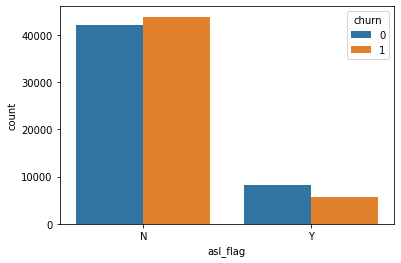

In [ ]:
# asl_flag feature
sns.countplot(x= "asl_flag", hue="churn", data=df);

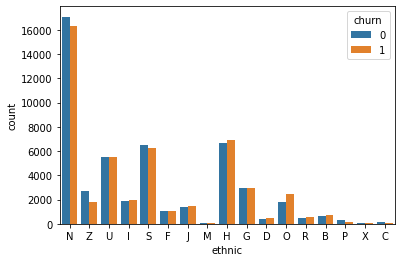

In [ ]:
# ethnic feature
sns.countplot(x= "ethnic", hue="churn", data=df);

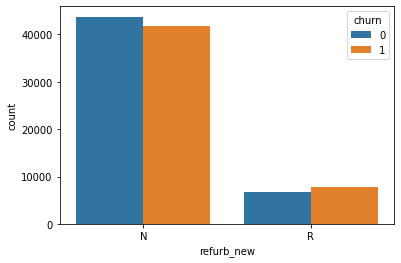

In [ ]:
# refurb_new feature 
sns.countplot(x= "refurb_new", hue="churn", data=df);

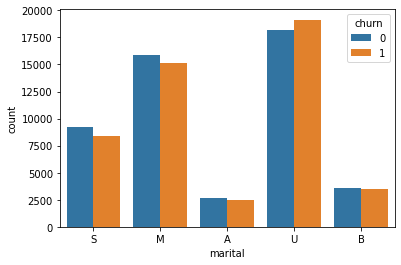

In [ ]:
# marital feature
sns.countplot(x= "marital", hue="churn", data=df);

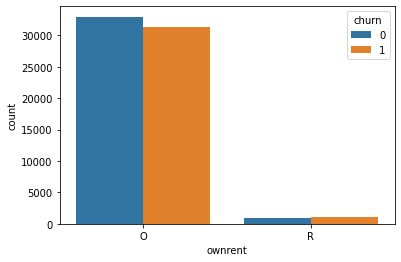

In [ ]:
# ownrent feature
sns.countplot(x= "ownrent", hue="churn", data=df);

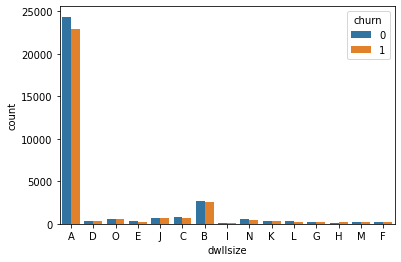

In [ ]:
# dwllsize feature
sns.countplot(x= "dwllsize", hue="churn", data=df);

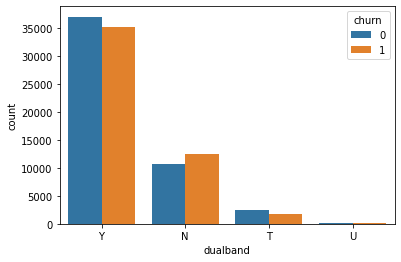

In [ ]:
# dualband feature
sns.countplot(x= "dualband", hue="churn", data=df);

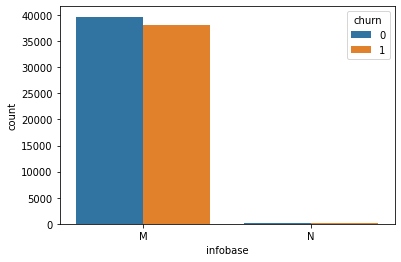

In [ ]:
# infobase feature
sns.countplot(x= "infobase", hue="churn", data=df);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

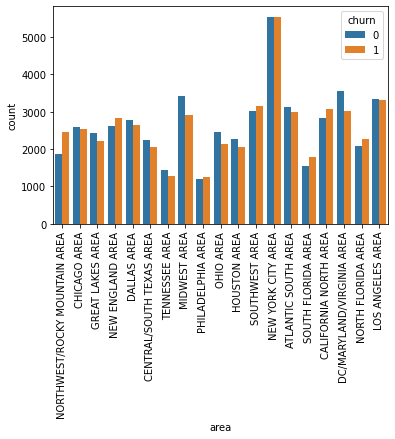

In [ ]:
# area feature
sns.countplot(x= "area", hue="churn", data=df);
plt.xticks(rotation = 90)

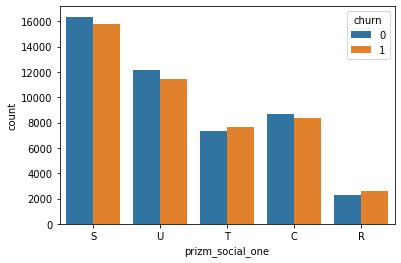

In [ ]:
# prizm_social_one feature
sns.countplot(x= "prizm_social_one", hue="churn", data=df);

In binary classificaion, there should be little to no multicollinearity; that is, independent variables should be relatively independent from one another. We use a heatmap to check for collinearity between variables, where a higher (darker) value represents higher correlation between two variables and a lower (lighter) value represents lower correlation between two variables.

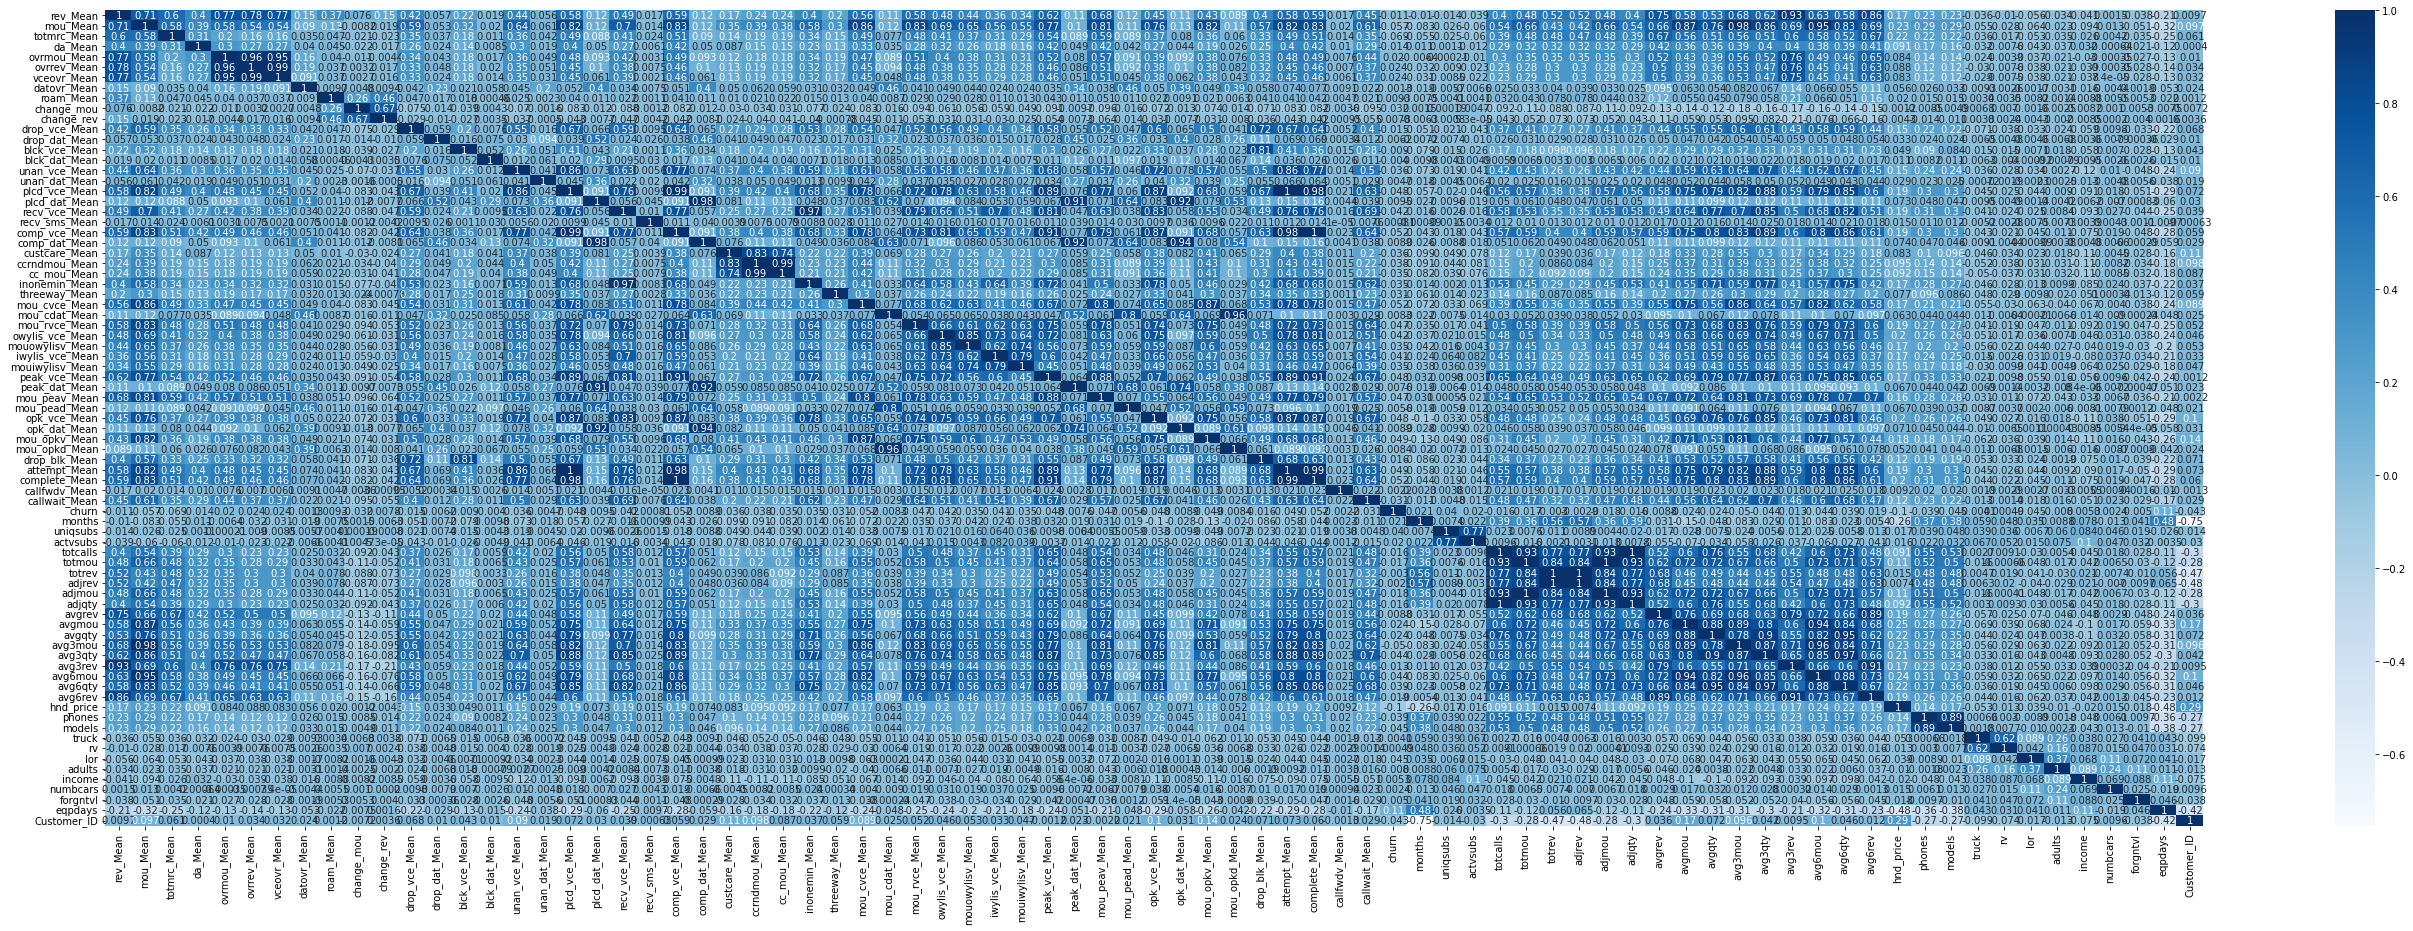

In [ ]:
plt.figure(figsize=(47, 15))
sns.heatmap(df.corr(), cmap='Blues', annot=True);

Correlation coefficient values below -0.2 are considered to be weak; -0.2-0.4 are moderate; >0.4 are strong. In this case, all correlations are 0.3 or below, so we can conclude that the variables are independent from one another. There definitely some features that fairly dependent on others, but for the majoroty, the correlation coefficient are less than <0.3

# Churn Analysis

It is important to compare the churn data against all the other data points in order to accuratley predict if a customer might churn. The Churn Rate formula is given by 



> (Loss ÷ Total) × 100, where 

Loss = the number of customers at the beginning minus the number of customers at the end

Total = the number of customers at the beginning




Given this formula, we can see the churn distribution which will help make a prediction of whether or not a cutomer will churn.

In [ ]:
# consider the missing values in the churn feature
total = df[(df['churn'] ==0)].count()[1] + df[(df['churn'] ==1)].count()[1]
churn = df[(df['churn'] ==1)].count()[1]

churn_rate = np.round(((churn) / total ) * 100, 1)

print("The churn rate is ", churn_rate, "%")

The churn rate is  49.5 %


Therefore, we should expect that around 49.5% of
customers to churn with the initial dataset. This gives us about a 50-50 chance that the customer will churn for our prediciton model.

# Find and Fill Missing Data

As the EDA showed, we have missing datapoints in the dataset. Missing data can negatively impact the accuracy of our model. We must combat this issue before splitting the data. Let's find the features that contain null values.

In [ ]:
df.columns[df.isnull().any()]

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'avg6mou', 'avg6qty', 'avg6rev', 'prizm_social_one',
       'area', 'dualband', 'refurb_new', 'hnd_price', 'phones', 'models',
       'hnd_webcap', 'truck', 'rv', 'ownrent', 'lor', 'dwlltype', 'marital',
       'adults', 'infobase', 'income', 'numbcars', 'HHstatin', 'dwllsize',
       'forgntvl', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15',
       'kid16_17', 'creditcd', 'eqpdays'],
      dtype='object')

Now that we see all the features that contain at least one null datapoint, we should exactly how many datapoints are missing from each feature, and if any are worth filling.

In [ ]:
missing_data = df.isnull().sum().sort_values(ascending = False).head(50)
# % of missing values
pd.DataFrame({'No. missing values': missing_data})

,No. missing values
numbcars,49366
dwllsize,38308
HHstatin,37923
ownrent,33706
dwlltype,31909
lor,30190
income,25436
adults,23019
infobase,22079
hnd_webcap,10189


There are 44 features that have null values, and it seems many of them are not relevant to the model as they have a significant number of data missing or the feature itself is just not essential. So we will first fill the features we want to keep based on relevance to the model and percentage of missing data.

In [ ]:
# fill null values of important features with mean
df['avg6qty'] = df['avg6qty'].fillna(df['avg6qty'].mean()) 
df['avg6rev'] = df['avg6rev'].fillna(df['avg6rev'].mean()) 
df['avg6mou'] = df['avg6mou'].fillna(df['avg6mou'].mean()) 
#df['change_rev'] = df['change_rev'].fillna(df['change_rev'].mean())
df['rev_Mean'] = df['rev_Mean'].fillna(df['rev_Mean'].mean())
df['totmrc_Mean']=df['totmrc_Mean'].fillna(df['totmrc_Mean'].mean())

Then, we create a list of the removable features and traverse the null columns to add the numerical features to the list. Then we drop the removable list of features as well as the rows that contain null data points.

In [ ]:
removables = ['dualband', 'refurb_new', 'hnd_webcap', 'ethnic', 'dwlltype',
             'infobase', 'HHstatin', 'dwllsize', 'ownrent', 'change_mou']
for f in df.columns[df.isnull().any()]:
  if df[f].dtype != 'object':
    removables.append(f)

# removes the non-essential features from dataset
df.drop(removables, axis=1, inplace=True)

# removes row that contains a null value in an essential feature
df.dropna(inplace=True)
print(removables)

['dualband', 'refurb_new', 'hnd_webcap', 'ethnic', 'dwlltype', 'infobase', 'HHstatin', 'dwllsize', 'ownrent', 'change_mou', 'mou_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'hnd_price', 'phones', 'models', 'truck', 'rv', 'lor', 'adults', 'income', 'numbcars', 'forgntvl', 'eqpdays']


Now, lets check that there are no null values anymore.

In [ ]:
print("\nMissing datapoints?", df.isnull().values.any())


Missing datapoints? False


Great! Next we handle the object features in the dataset.

In [ ]:
df.columns[df.dtypes=='object']

Index(['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area',
       'marital', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17',
       'creditcd'],
      dtype='object')

# Feature Engineering

Because the object features don't contain numerical data points, must uniquely encode each datapoint so we can use these features in the model.

In [ ]:
# Transform categorical variables to numerical values and create a new variable 
# to store each of the encoded values

# dataset shape beform transformation
df.shape
encoder = LabelEncoder()
df['prizm_social_one_encoded'] = encoder.fit_transform(df['prizm_social_one'])
df['asl_flag_encoded'] = encoder.fit_transform(df['asl_flag'])
df['area_encoded'] = encoder.fit_transform(df['area'])
df['new_cell_encoded'] = encoder.fit_transform(df['new_cell'])
df['crclscod_encoded'] = encoder.fit_transform(df['crclscod'])
df['marital_encoded'] = encoder.fit_transform(df['marital'])
df['kid0_2_encoded'] = encoder.fit_transform(df['kid0_2'])
df['kid3_5_encoded'] = encoder.fit_transform(df['kid3_5'])
df['kid6_10_encoded'] = encoder.fit_transform(df['kid6_10'])
df['kid11_15_encoded'] = encoder.fit_transform(df['kid11_15'])
df['kid16_17_encoded'] = encoder.fit_transform(df['kid16_17'])
df['creditcd_encoded'] = encoder.fit_transform(df['creditcd'])
df.head()

# dataset shape after transformation
df.shape

(91570, 83)

Above, we added 12 new features to our data. But notice that these 12 new features represent 12 existing features in the dataset with numerical encodings. So, we drop the non-numerical pre-existing features.

In [ ]:
# define X (features) and y (target) and remove duplicate features that will not be used in the model
drop = ['prizm_social_one', 'area', 'new_cell', 'crclscod', 'marital', 'kid0_2',
        'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd', 'asl_flag', 'churn', 'Customer_ID']
X = df.drop(drop, axis=1)
y = df['churn']

X = X.to_numpy()
y = y.to_numpy()


# Modeling

Now it's time to model the data. There are many binary classification algorithms that Python provides in Scikit-learn. The most common ones are LogisticRegression, LinearSVC, DecisionTreeClassifier, RandomForestClassifier, GaussianNB and KNeighborsClassifier. As a start, I will use LogisticRegression to demonstrate the results of the EDA and feature engineering, then I will show how each binary classification algorithm compares to one another. 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold

# splitting the dataset into X_train, X_test, y_train, and y_test
# retaining 20% of the data for testing, and use a random_state value of "0" (default)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scores = []
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X_train):
  X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
  y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_fold = scaler.transform(X_train_fold)
  X_val_fold = scaler.transform(X_val_fold)

  clf = LogisticRegression(max_iter=500)
  clf.fit(X_train_fold, y_train_fold)
  scores.append(clf.score(X_val_fold, y_val_fold))

scores

[0.5685230685230686,
 0.5672650331035424,
 0.5630332400518736,
 0.5664459763838646,
 0.5700634768957751]

In [ ]:

# using logisitical regression as first model
model = LogisticRegression()

ss = StandardScaler()
# normalize data for numerical stability
X_train2 = ss.fit_transform(X_train)
X_test2 = ss.transform(X_test)

model.fit(X_train2, y_train, sample_weight=0.8)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

We make the prediction against the testing data

In [ ]:
# For each record in the test set, make a prediction for the y value using the model
# The predicted values are stored in the predictions array
predictions = model.predict(X_test2)

Now, we set up a confusion matrix for binary classification that tells us the rate of true positives, true negatives, false positives, and false negatives. This will tellus how accurate the model is.

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  4998
False Positive(FP) =  3907
True Negative(TN)  =  5306
False Negative(FN) =  4103


In [ ]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = ', accuracy)

Accuracy of the binary classifier =  0.5626296822103309


Let's visualive the logisitc regression confusion matrix.

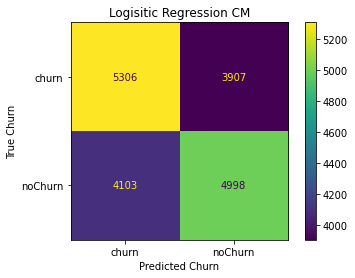

In [ ]:
# set up confusion matrix
cm = confusion_matrix(y_test, predictions) 
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['churn', 'noChurn'])
cmd_obj.plot()
cmd_obj.ax_.set(
                    title='Logisitic Regression CM', 
                    xlabel='Predicted Churn', 
                    ylabel='True Churn')
plt.show()

As stated early, logistic regression is one model we can use for binary classification. So we can compare the results of fitting the data onto a logisitcal regression model with others.

In [ ]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

Here, we fit the data on each model.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


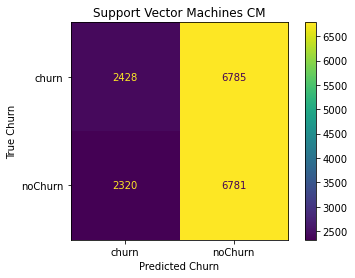

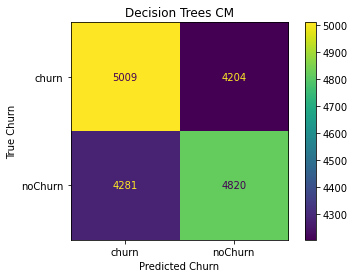

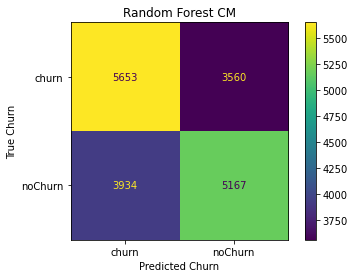

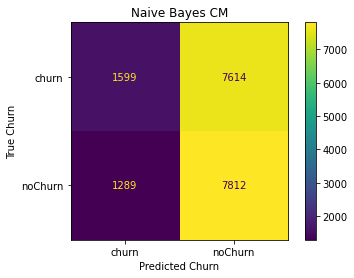

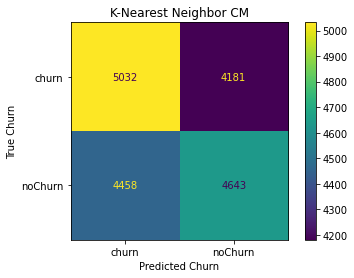

In [ ]:
accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

    # ensures we are not displaying same CM txice
    if key != 'Logistic Regression':
      cm = confusion_matrix(y_test, predictions) 
      cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['churn', 'noChurn'])
      cmd_obj.plot()
      cmd_obj.ax_.set(
                    title= key + ' CM', 
                    xlabel='Predicted Churn', 
                    ylabel='True Churn')
      plt.show()

In [ ]:
# display data on accuracy, precision and recall into table to compare
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.553293,0.453137,0.562773
Support Vector Machines,0.502839,0.745083,0.499853
Decision Trees,0.536693,0.529612,0.534131
Random Forest,0.590805,0.567740,0.592071
Naive Bayes,0.513869,0.858367,0.506418
K-Nearest Neighbor,0.528284,0.510164,0.526179


Finally, we can plot the results of each model to compare them against other models.

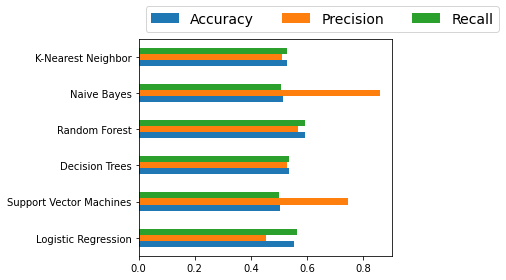

In [ ]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

The overall range of accuracy of my model is between 50%-60%. This is quite a low accuracy so we can tune hyperparamters to imporve the accuracy.

# Tuning Hyperparameters

First we create a pipline. This pipline will help from data extraction to preprocessing to model training and deployment. From here, we can see what paramters we have available.

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('lg', LogisticRegression(max_iter=500))])

In [ ]:
l =LogisticRegression()
l.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Now, we fit the pipeline and tuned hyperparameters into GridSearchCV(), which will help find the optimal parameter values in the grid. WARNING: this will take several minutes (~5 minutes)

In [ ]:
param = {'lg__C' : [0.1, 0.5],
         'lg__penalty' : ['l1', 'l2', 'none'],
         'lg__max_iter' : [250, 500]
    } 
search = GridSearchCV(pipe, param, cv=kf, verbose=2)
search.fit(X_train, y_train)
print(search.best_params_, search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ........lg__C=0.1, lg__max_iter=250, lg__penalty=l1; total time=   0.1s
[CV] END ........lg__C=0.1, lg__max_iter=250, lg__penalty=l1; total time=   0.1s
[CV] END ........lg__C=0.1, lg__max_iter=250, lg__penalty=l1; total time=   0.1s
[CV] END ........lg__C=0.1, lg__max_iter=250, lg__penalty=l1; total time=   0.1s
[CV] END ........lg__C=0.1, lg__max_iter=250, lg__penalty=l1; total time=   0.1s
[CV] END ........lg__C=0.1, lg__max_iter=250, lg__penalty=l2; total time=   3.6s
[CV] END ........lg__C=0.1, lg__max_iter=250, lg__penalty=l2; total time=   4.9s
[CV] END ........lg__C=0.1, lg__max_iter=250, lg__penalty=l2; total time=   4.3s
[CV] END ........lg__C=0.1, lg__max_iter=250, lg__penalty=l2; total time=   4.4s
[CV] END ........lg__C=0.1, lg__max_iter=250, lg__penalty=l2; total time=   3.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ......lg__C=0.1, lg__max_iter=250, lg__penalty=none; total time=   5.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ......lg__C=0.1, lg__max_iter=250, lg__penalty=none; total time=   5.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ......lg__C=0.1, lg__max_iter=250, lg__penalty=none; total time=   4.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ......lg__C=0.1, lg__max_iter=250, lg__penalty=none; total time=   5.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ......lg__C=0.1, lg__max_iter=250, lg__penalty=none; total time=   5.5s
[CV] END ........lg__C=0.1, lg__max_iter=500, lg__penalty=l1; total time=   0.1s
[CV] END ........lg__C=0.1, lg__max_iter=500, lg__penalty=l1; total time=   0.1s
[CV] END ........lg__C=0.1, lg__max_iter=500, lg__penalty=l1; total time=   0.1s
[CV] END ........lg__C=0.1, lg__max_iter=500, lg__penalty=l1; total time=   0.1s
[CV] END ........lg__C=0.1, lg__max_iter=500, lg__penalty=l1; total time=   0.1s
[CV] END ........lg__C=0.1, lg__max_iter=500, lg__penalty=l2; total time=   4.1s
[CV] END ........lg__C=0.1, lg__max_iter=500, lg__penalty=l2; total time=   5.5s
[CV] END ........lg__C=0.1, lg__max_iter=500, lg__penalty=l2; total time=   4.9s
[CV] END ........lg__C=0.1, lg__max_iter=500, lg__penalty=l2; total time=   4.5s
[CV] END ........lg__C=0.1, lg__max_iter=500, lg__penalty=l2; total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ......lg__C=0.1, lg__max_iter=500, lg__penalty=none; total time=  10.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ......lg__C=0.1, lg__max_iter=500, lg__penalty=none; total time=  10.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ......lg__C=0.1, lg__max_iter=500, lg__penalty=none; total time=  10.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ......lg__C=0.1, lg__max_iter=500, lg__penalty=none; total time=  10.2s
[CV] END ......lg__C=0.1, lg__max_iter=500, lg__penalty=none; total time=   9.5s
[CV] END ........lg__C=0.5, lg__max_iter=250, lg__penalty=l1; total time=   0.1s
[CV] END ........lg__C=0.5, lg__max_iter=250, lg__penalty=l1; total time=   0.1s
[CV] END ........lg__C=0.5, lg__max_iter=250, lg__penalty=l1; total time=   0.1s
[CV] END ........lg__C=0.5, lg__max_iter=250, lg__penalty=l1; total time=   0.1s
[CV] END ........lg__C=0.5, lg__max_iter=250, lg__penalty=l1; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ........lg__C=0.5, lg__max_iter=250, lg__penalty=l2; total time=   5.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ........lg__C=0.5, lg__max_iter=250, lg__penalty=l2; total time=   5.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ........lg__C=0.5, lg__max_iter=250, lg__penalty=l2; total time=   5.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ........lg__C=0.5, lg__max_iter=250, lg__penalty=l2; total time=   5.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ........lg__C=0.5, lg__max_iter=250, lg__penalty=l2; total time=   5.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ......lg__C=0.5, lg__max_iter=250, lg__penalty=none; total time=   8.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ......lg__C=0.5, lg__max_iter=250, lg__penalty=none; total time=   6.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ......lg__C=0.5, lg__max_iter=250, lg__penalty=none; total time=   5.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ......lg__C=0.5, lg__max_iter=250, lg__penalty=none; total time=   4.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ......lg__C=0.5, lg__max_iter=250, lg__penalty=none; total time=   5.6s
[CV] END ........lg__C=0.5, lg__max_iter=500, lg__penalty=l1; total time=   0.1s
[CV] END ........lg__C=0.5, lg__max_iter=500, lg__penalty=l1; total time=   0.1s
[CV] END ........lg__C=0.5, lg__max_iter=500, lg__penalty=l1; total time=   0.1s
[CV] END ........lg__C=0.5, lg__max_iter=500, lg__penalty=l1; total time=   0.1s
[CV] END ........lg__C=0.5, lg__max_iter=500, lg__penalty=l1; total time=   0.1s
[CV] END ........lg__C=0.5, lg__max_iter=500, lg__penalty=l2; total time=   6.3s
[CV] END ........lg__C=0.5, lg__max_iter=500, lg__penalty=l2; total time=   6.4s
[CV] END ........lg__C=0.5, lg__max_iter=500, lg__penalty=l2; total time=   6.2s
[CV] END ........lg__C=0.5, lg__max_iter=500, lg__penalty=l2; total time=   6.5s
[CV] END ........lg__C=0.5, lg__max_iter=500, lg__penalty=l2; total time=  10.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ......lg__C=0.5, lg__max_iter=500, lg__penalty=none; total time=   9.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ......lg__C=0.5, lg__max_iter=500, lg__penalty=none; total time=   9.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ......lg__C=0.5, lg__max_iter=500, lg__penalty=none; total time=   9.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ......lg__C=0.5, lg__max_iter=500, lg__penalty=none; total time=   9.5s
[CV] END ......lg__C=0.5, lg__max_iter=500, lg__penalty=none; total time=  10.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fil

{'lg__C': 0.1, 'lg__max_iter': 250, 'lg__penalty': 'none'} 0.5670388552376131


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Finally, we fit the training set onto the optimal parameters and calculate the training and testing scores.

In [ ]:
best_pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('lg', LogisticRegression(max_iter=500,  solver='liblinear'))
])

best_pipe.fit(X_train, y_train)
train_acc = best_pipe.score(X_train, y_train)
test_acc = best_pipe.score(X_test, y_test)

print('Train Accuracy:', train_acc)
print('Test Accuracy:', test_acc)

Train Accuracy: 0.5680353827672818
Test Accuracy: 0.560991591132467


That concludes the project!